In [173]:
# Import libraries
import numpy as np
import pandas as pd

from ISLP import load_data

import matplotlib.pyplot as plt
from matplotlib import image

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import mean_absolute_error

In [174]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
from keras.applications.resnet import preprocess_input
from keras.applications import ResNet50
from keras.applications import imagenet_utils

In [ ]:
import h5py
import numpy as np
f = h5py.File('bird_spectrograms.hdf5', 'r')


In [181]:
list(f.keys())

['amecro',
 'amerob',
 'bewwre',
 'bkcchi',
 'daejun',
 'houfin',
 'houspa',
 'norfli',
 'rewbla',
 'sonspa',
 'spotow',
 'whcspa']

<BarContainer object of 12 artists>

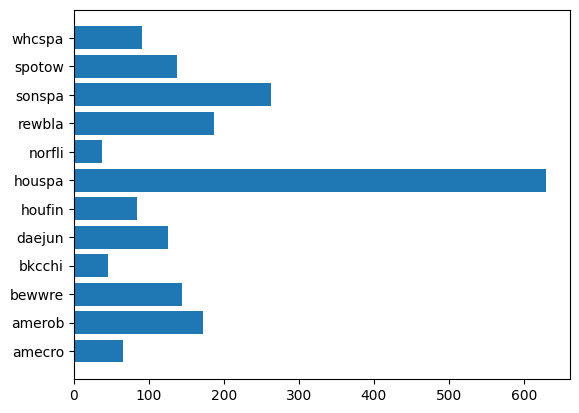

In [276]:
bird=[]
samples=[]
for x in list(f.keys()):
    bird.append(x)
    samples.append(f[str(x)].shape[2])

plt.barh(bird,samples)

In [182]:
shapes=[]
for x in list(f.keys()):
    print(f[str(x)].shape)
    shapes.append(str(x))
    shapes.append(f[str(x)].shape[2])
print(shapes)

(128, 517, 66)
(128, 517, 172)
(128, 517, 144)
(128, 517, 45)
(128, 517, 125)
(128, 517, 84)
(128, 517, 630)
(128, 517, 37)
(128, 517, 187)
(128, 517, 263)
(128, 517, 137)
(128, 517, 91)
['amecro', 66, 'amerob', 172, 'bewwre', 144, 'bkcchi', 45, 'daejun', 125, 'houfin', 84, 'houspa', 630, 'norfli', 37, 'rewbla', 187, 'sonspa', 263, 'spotow', 137, 'whcspa', 91]


Let's use rewbla and amerob, since they have rather similar classes.

In [183]:
def rewbla_class_maker():
    names=[]
    features_frame=[]
    dset = f['rewbla']
    for i in range(dset.shape[2]):
        features_frame.append(dset[:,:,i])
        names.append("rewbla")

    return (features_frame, names)


In [184]:
x1=rewbla_class_maker()

In [185]:
def amerob_class_maker():
    names=[]
    features_frame=[]
    dset = f['amerob']
    for i in range(dset.shape[2]):
        features_frame.append(dset[:,:,i])
        names.append("amerob")

    return (features_frame, names)

In [186]:
x2=amerob_class_maker()

In [188]:
train_features=np.concatenate([x2[0],x1[0]], axis=0)

In [189]:
train_names=np.concatenate([x2[1],x1[1]], axis=0)

In [190]:
train_names = (train_names == 'rewbla').astype(int)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(train_features
                                                    , train_names
                                                    , test_size=0.33, random_state=13)


In [192]:
X_train = X_train.reshape(X_train.shape[0] ,-1)
X_test = X_test.reshape(X_test.shape[0] ,-1)

In [193]:
# define a neural network model 

modnn = Sequential(
    [
    Dense(units=50, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(rate=0.4),
    Dense(units=1)
    ])
modnn

c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential_19, built=True>

In [194]:
# compiling the neural network model 
modnn.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [195]:
X_train.shape

(240, 66176)

In [196]:
history = modnn.fit(X_train, y_train,
                    epochs=60,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.4758 - loss: 8.4056 - val_accuracy: 0.4538 - val_loss: 8.7515
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5312 - loss: 7.4962 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5249 - loss: 7.5740 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5388 - loss: 7.3524 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5360 - loss: 7.3980 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5348 - loss: 7.4165 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5588 - loss: 7.0333 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5581 - loss: 7.0445 - val_accuracy: 0.4622 - val_loss: 8.5741

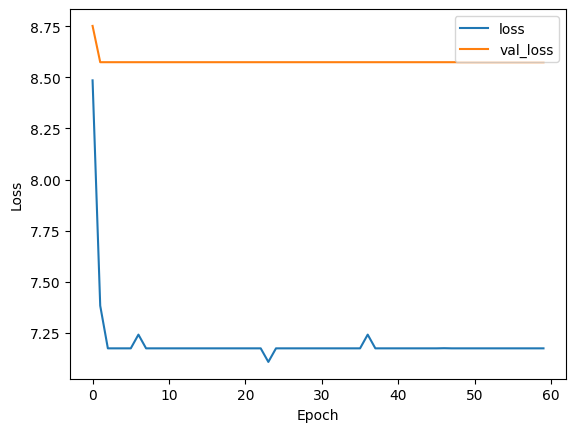

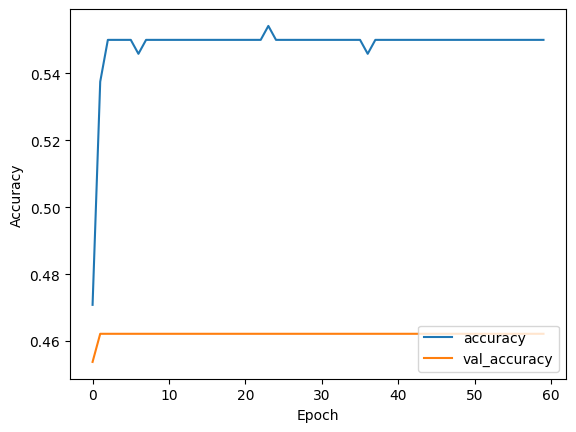

In [197]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [198]:
score = modnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 46.22%


Let's try some different hyper parameters.

In [199]:

modnn = Sequential(
    [
    Dense(units=50, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(rate=0.1),
    Dense(units=1)
    ])
modnn

# compiling the neural network model 
modnn.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history = modnn.fit(X_train, y_train,
                    epochs=60,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5444 - loss: 7.2643 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 2/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4940 - loss: 7.9540 - val_accuracy: 0.5378 - val_loss: 7.4495
Epoch 3/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4713 - loss: 8.5221 - val_accuracy: 0.5378 - val_loss: 7.4495
Epoch 4/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4652 - loss: 8.6203 - val_accuracy: 0.5378 - val_loss: 7.4495
Epoch 5/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4268 - loss: 9.2389 - val_accuracy: 0.5378 - val_loss: 7.4495
Epoch 6/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4414 - loss: 9.0040 - val_accuracy: 0.5378 - val_loss: 7.4495
Epoch 7/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4358 - loss: 9.0937 - val_accuracy: 0.5378 - val_loss: 7.4495
Epoch 8/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4831 - loss: 8.3312 - val_accuracy: 0.5378 - v

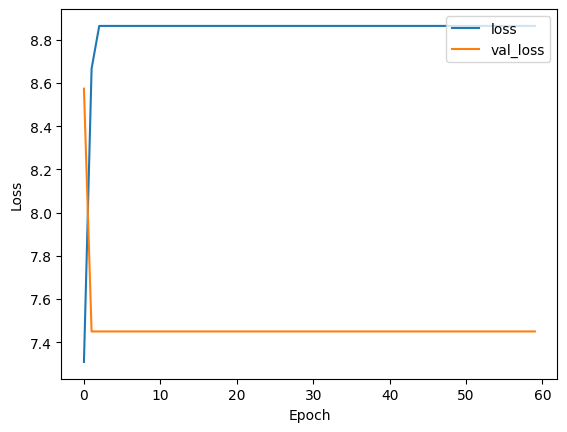

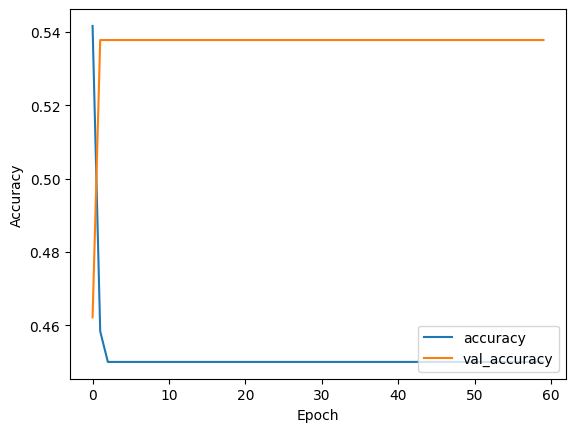

In [200]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [201]:
score = modnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 53.78%


In [202]:

modnn = Sequential(
    [
    Dense(units=50, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=1)
    ])
modnn

# compiling the neural network model 
modnn.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history = modnn.fit(X_train, y_train,
                    epochs=60,
                    batch_size=8,
                    validation_data=(X_test, y_test))

Epoch 1/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5662 - loss: 6.9316 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 2/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5523 - loss: 7.1378 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 3/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5454 - loss: 7.2470 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 4/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5508 - loss: 7.1618 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 5/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5415 - loss: 7.3089 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 6/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5411 - loss: 7.3158 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 7/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5827 - loss: 6.6524 - val_accuracy: 0.4622 - val_loss: 8.5741
Epoch 8/60
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5616 - loss: 6.9892 - val_accuracy: 0.4622 - v

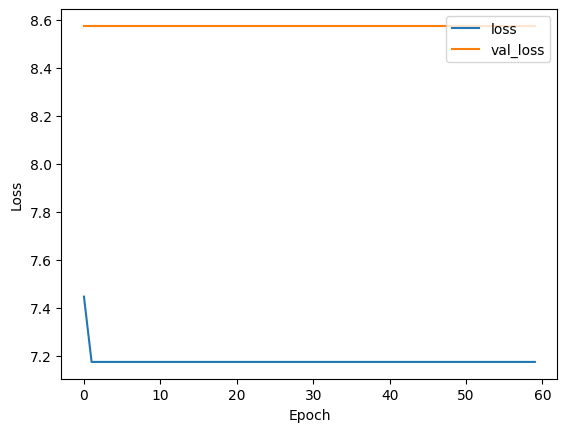

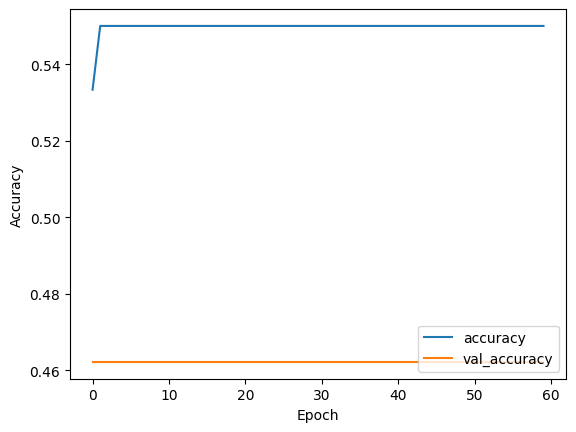

In [203]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [204]:
score = modnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 46.22%


Let's try using a  CNN now. To do this, we need to reshape our vectors to avoid flattening them. Reloading them as before should be fine for our purposes.

In [205]:
X_train, X_test, y_train, y_test = train_test_split(train_features
                                                    , train_names
                                                    , test_size=0.33, random_state=13)

We must reshape our matrix to add an important dimension. For Usual RGB images, the last dimension is reserved for color, but we are in black and white, so we just need a 1.

In [208]:
X_train = X_train.reshape((240, 128, 517, 1))


In [209]:
X_test=X_test.reshape((119,128,517,1))

Stack Abuse. (2023, July 19). Don’t Use Flatten: Global Pooling for CNNs with TensorFlow and Keras.https://stackabuse.com/dont-use-flatten-global-pooling-for-cnns-with-tensorflow-and-keras/

In [ ]:
from tensorflow.keras.layers import  GlobalAveragePooling2D

model_cnn = Sequential(
    [
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128,517,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    GlobalAveragePooling2D(),

    Dropout(rate=0.2),
    #Because of our small amount of data, we lower the dropout rate to 0.2
    Dense(units=64, activation='relu'),
    Dense(units=10, activation='softmax')
    ])

model_cnn.summary()

c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 517, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 64, 258, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 258, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 32, 129, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
skadaver (https://stats.stackexchange.com/users/254303/skadaver), Cross Entropy vs. Sparse Cross Entropy: When to use one over the other, URL (version: 2020-02-03): https://stats.stackexchange.com/q/420730


In [212]:


model_cnn.compile(loss='sparse_categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])



In [213]:
history = model_cnn.fit(X_train, y_train,
                        epochs=10,
                        batch_size=16,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 922ms/step - accuracy: 0.3985 - loss: 3.3950 - val_accuracy: 0.6042 - val_loss: 0.6711
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 629ms/step - accuracy: 0.5285 - loss: 1.0613 - val_accuracy: 0.6042 - val_loss: 0.6720
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 682ms/step - accuracy: 0.5013 - loss: 0.8713 - val_accuracy: 0.6042 - val_loss: 0.6674
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 607ms/step - accuracy: 0.5407 - loss: 0.7865 - val_accuracy: 0.6042 - val_loss: 0.6648
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 648ms/step - accuracy: 0.5278 - loss: 0.7416 - val_accuracy: 0.6042 - val_loss: 0.6799
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 647ms/step - accuracy: 0.5373 - loss: 0.7704 - val_accuracy: 0.6042 - val_loss: 0.7089
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 696ms/step - accuracy: 0.4631 - loss: 0.7933 - val_accuracy: 0.6250 - val_loss: 0.6853
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 705ms/step - accuracy: 0.4475 - loss: 0.7804 - val_accuracy:

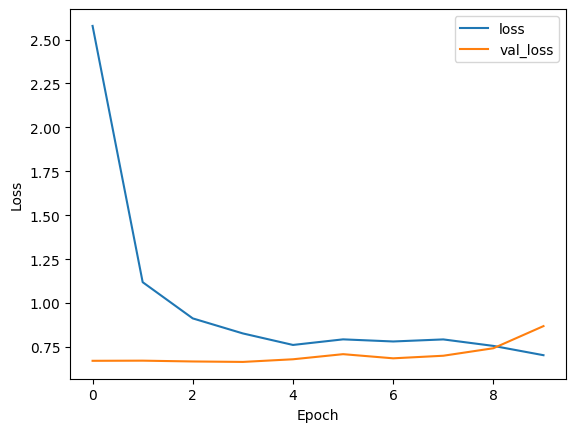

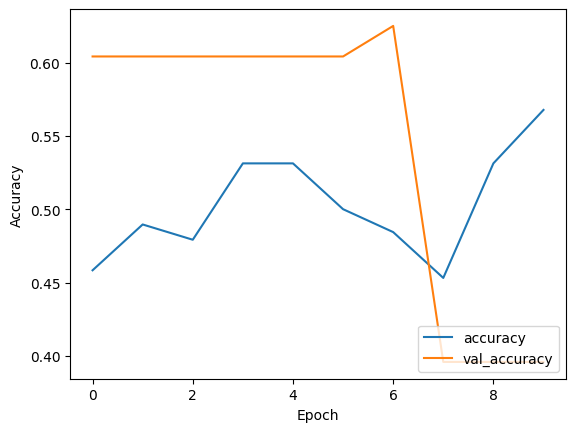

In [214]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [215]:
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 53.78%


Our model hasn't converged yet, let's try to increase epochs. Though, there is a risk we will run out of memory.

In [ ]:

model_cnn = Sequential(
    [
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128,517,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    GlobalAveragePooling2D(),
    Dropout(rate=0.2),

    Dense(units=64, activation='relu'),
    Dense(units=2, activation='softmax')
    ])


In [217]:

model_cnn.compile(loss='sparse_categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [218]:
history = model_cnn.fit(X_train, y_train,
                        epochs=40,
                        batch_size=16,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 704ms/step - accuracy: 0.4504 - loss: 1.6742 - val_accuracy: 0.6250 - val_loss: 0.6801
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 673ms/step - accuracy: 0.5962 - loss: 0.6863 - val_accuracy: 0.3958 - val_loss: 0.9911
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 728ms/step - accuracy: 0.4830 - loss: 0.7615 - val_accuracy: 0.6042 - val_loss: 0.6800
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 651ms/step - accuracy: 0.4857 - loss: 0.7774 - val_accuracy: 0.6458 - val_loss: 0.6774
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 659ms/step - accuracy: 0.4913 - loss: 0.7273 - val_accuracy: 0.3958 - val_loss: 0.7735
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 619ms/step - accuracy: 0.4833 - loss: 0.7302 - val_accuracy: 0.6250 - val_loss: 0.6814
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 661ms/step - accuracy: 0.4597 - loss: 0.7237 - val_accuracy: 0.5833 - val_loss: 0.6835
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 712ms/step - accuracy: 0.5292 - loss: 0.7122 - val_accuracy:

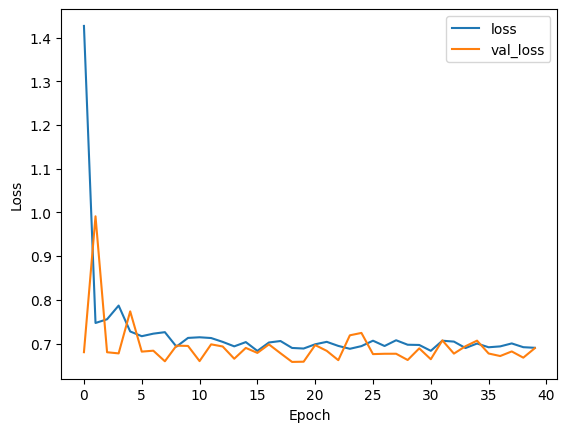

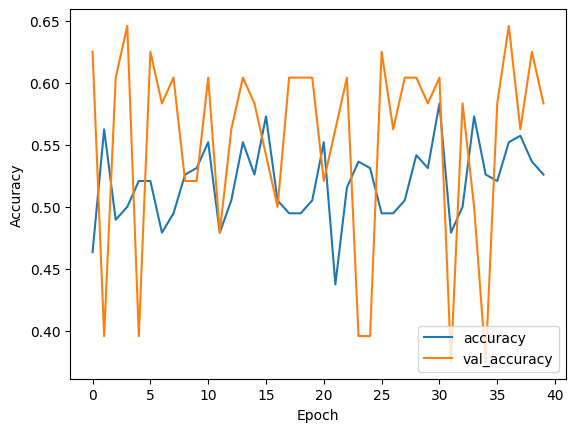

In [219]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [220]:
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 59.66%


In [223]:
X_train_seq = X_train.transpose(0, 2, 1,3)

In [233]:
X_test_seq = X_test.transpose(0,2,1,3)

https://keras.io/api/optimizers/rmsprop/

In [225]:


model = Sequential([
    SimpleRNN(units=64, input_shape=(517, 128)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax') 
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [227]:
history = model.fit(X_train_seq, y_train,
                        epochs=40,
                        batch_size=16,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.4869 - loss: 0.7709 - val_accuracy: 0.6042 - val_loss: 0.6638
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5616 - loss: 0.6948 - val_accuracy: 0.3958 - val_loss: 0.6948
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5596 - loss: 0.6928 - val_accuracy: 0.5417 - val_loss: 0.6889
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.6083 - loss: 0.6790 - val_accuracy: 0.6458 - val_loss: 0.6583
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.5725 - loss: 0.6683 - val_accuracy: 0.4375 - val_loss: 0.7058
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.5489 - loss: 0.6823 - val_accuracy: 0.6458 - val_loss: 0.6649
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5944 - loss: 0.6826 - val_accuracy: 0.6250 - val_loss: 0.6669
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6196 - loss: 0.6548 - val_accuracy: 0.6458 -

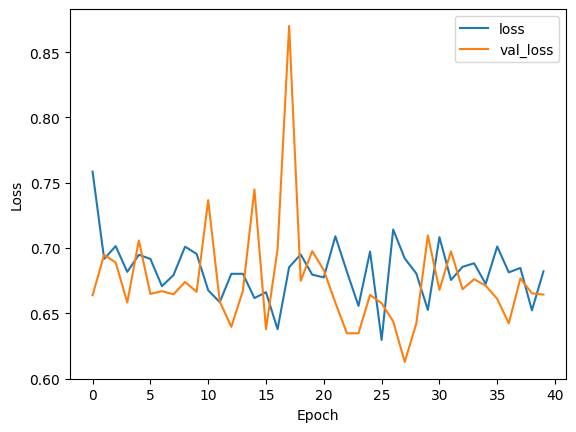

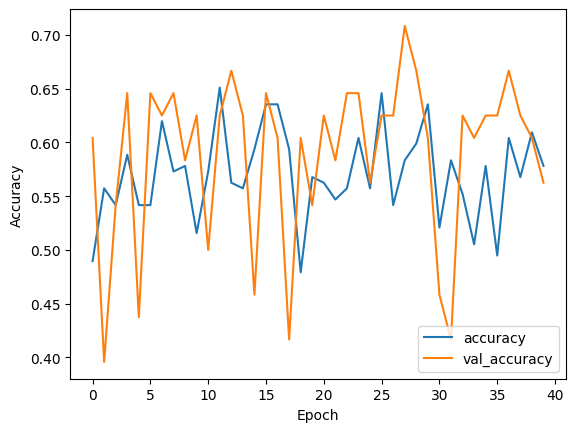

In [228]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [234]:
score = model.evaluate(X_test_seq, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 45.38%


In [235]:
from tensorflow.keras.optimizers import RMSprop

model = Sequential([
    SimpleRNN(units=64, input_shape=(517, 128)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax') 
])

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [236]:
history = model.fit(X_train_seq, y_train,
                        epochs=40,
                        batch_size=16,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.4801 - loss: 0.8105 - val_accuracy: 0.5833 - val_loss: 0.7154
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.4025 - loss: 0.7544 - val_accuracy: 0.5208 - val_loss: 0.7191
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.4283 - loss: 0.7356 - val_accuracy: 0.5417 - val_loss: 0.6975
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4959 - loss: 0.6976 - val_accuracy: 0.5625 - val_loss: 0.6966
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5283 - loss: 0.6816 - val_accuracy: 0.5833 - val_loss: 0.7011
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5735 - loss: 0.6693 - val_accuracy: 0.5833 - val_loss: 0.6938
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.6200 - loss: 0.6636 - val_accuracy: 0.5208 - val_loss: 0.6968
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6268 - loss: 0.6701 - val_accuracy: 0.6042 -

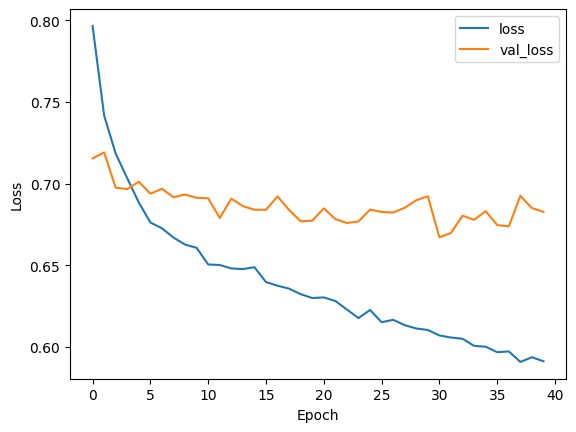

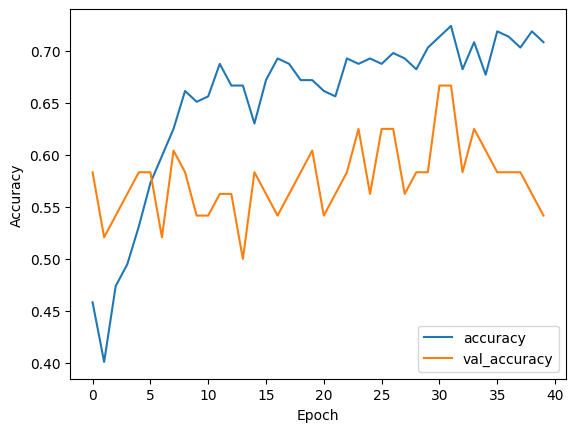

In [237]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [238]:
score = model.evaluate(X_test_seq, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 57.98%


It looks like decreasing the learning rate has improved our results.

Now we need to do multiclass classification.

In [239]:
shapes=[]
for x in list(f.keys()):
    print(f[str(x)].shape)
    shapes.append(str(x))
    shapes.append(f[str(x)].shape[2])
print(shapes)

(128, 517, 66)
(128, 517, 172)
(128, 517, 144)
(128, 517, 45)
(128, 517, 125)
(128, 517, 84)
(128, 517, 630)
(128, 517, 37)
(128, 517, 187)
(128, 517, 263)
(128, 517, 137)
(128, 517, 91)
['amecro', 66, 'amerob', 172, 'bewwre', 144, 'bkcchi', 45, 'daejun', 125, 'houfin', 84, 'houspa', 630, 'norfli', 37, 'rewbla', 187, 'sonspa', 263, 'spotow', 137, 'whcspa', 91]


In [245]:
x_full=[]
names_full=[]

In [246]:
for x in list(f.keys()):
    dset=f[str(x)]
    for i in range(37):
        x_full.append(dset[:,:,i])
        names_full.append(str(x))


We now have a full dataset. Let's convert the names to categorical.

In [247]:
len(list(f.keys()))

12

Let's do one hot encoding. We draw our examples from https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial.

In [248]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer, LabelEncoder

names_list = [[name] for name in names_full]
enc = OneHotEncoder(handle_unknown='ignore')



enc.fit(names_list)

names_full=np.array(names_full)

names_full=names_full.reshape(-1, 1)

names_enc = enc.transform(names_full).toarray()


names_enc

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [249]:
X_train, X_test, y_train, y_test = train_test_split(x_full
                                                    , names_enc
                                                    , test_size=0.33, random_state=13)

As before, let's flatten our matrices.

In [250]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [251]:
X_train = X_train.reshape(X_train.shape[0] ,-1)
X_test = X_test.reshape(X_test.shape[0] ,-1)

In [252]:
# define a neural network model 

modelnn = Sequential(
    [
    Dense(256, activation='relu', input_shape=(66176,)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(12, activation='softmax') #There are 12 birds so we set this layer to 12)
    ])

modelnn.summary()

c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 256)            │    16,941,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,975,756 (64.76 MB)

 Trainable params: 16,975,756 (64.76 MB)

 Non-trainable params: 0 (0.00 B)

In [253]:
modelnn.compile(loss='categorical_crossentropy'
                ,optimizer='rmsprop'
                ,metrics=['accuracy'])

In [254]:
history = modelnn.fit(X_train, y_train
                      , epochs=15, batch_size=128
                      , validation_split=0.2)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.0957 - loss: 4993.8574 - val_accuracy: 0.1333 - val_loss: 6268.3115
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.0847 - loss: 10134.0664 - val_accuracy: 0.1167 - val_loss: 3322.0828
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.0823 - loss: 4333.0913 - val_accuracy: 0.0333 - val_loss: 585.0152
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 409ms/step - accuracy: 0.0713 - loss: 1655.5189 - val_accuracy: 0.1000 - val_loss: 654.1652
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step - accuracy: 0.0414 - loss: 1163.4216 - val_accuracy: 0.1000 - val_loss: 412.7993
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step - accuracy: 0.0927 - loss: 382.8105 - val_accuracy: 0.1167 - val_loss: 998.0284
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step - accuracy: 0.0990 - loss: 971.6483 - val_accuracy: 0.0333 - val_loss: 2.5140
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 485ms/step - accuracy: 0.1068 - loss: 2.4906 - v

In [255]:
score = modelnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 7.48%


Let's try using a CNN now. Recall we must reshape our matrix.

In [256]:
X_train, X_test, y_train, y_test = train_test_split(x_full
                                                    , names_enc
                                                    , test_size=0.33, random_state=13)

In [257]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [258]:
X_train = X_train.reshape((297, 128, 517, 1))
X_test=X_test.reshape((147,128,517,1))

In [ ]:
model_cnn = Sequential(
    [
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128,517,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    GlobalAveragePooling2D(),
    Dropout(rate=0.2),
    #Because of our small amount of data, we lower the dropout rate to 0.2
    Dense(units=64, activation='relu'),
    Dense(units=12, activation='softmax')
    ])

model_cnn.summary()

c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 128, 517, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 64, 258, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 64, 258, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 32, 129, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,756 (92.80 KB)

 Trainable params: 23,756 (92.80 KB)

 Non-trainable params: 0 (0.00 B)

In [260]:
#Since we used one hot encoding, we don't need to use sparse categorical crossentropy

model_cnn.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])


history = model_cnn.fit(X_train, y_train,
                        epochs=10,
                        batch_size=16,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 643ms/step - accuracy: 0.0656 - loss: 5.7832 - val_accuracy: 0.1333 - val_loss: 2.5684
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 748ms/step - accuracy: 0.1276 - loss: 2.7599 - val_accuracy: 0.0167 - val_loss: 2.5642
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 614ms/step - accuracy: 0.1138 - loss: 2.5751 - val_accuracy: 0.0000e+00 - val_loss: 2.6589
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 621ms/step - accuracy: 0.1105 - loss: 2.5480 - val_accuracy: 0.0833 - val_loss: 2.5162
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 727ms/step - accuracy: 0.1099 - loss: 2.5070 - val_accuracy: 0.0667 - val_loss: 2.4905
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 658ms/step - accuracy: 0.0902 - loss: 2.4898 - val_accuracy: 0.0000e+00 - val_loss: 2.5388
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 642ms/step - accuracy: 0.1366 - loss: 2.4854 - val_accuracy: 0.0667 - val_loss: 2.6285
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 639ms/step - accuracy: 0.0900 - loss: 2.5303 - va

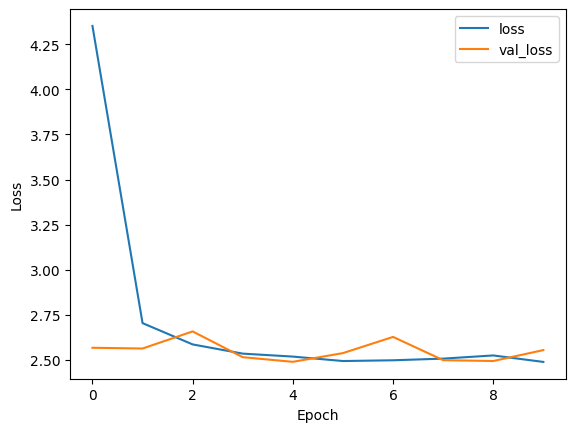

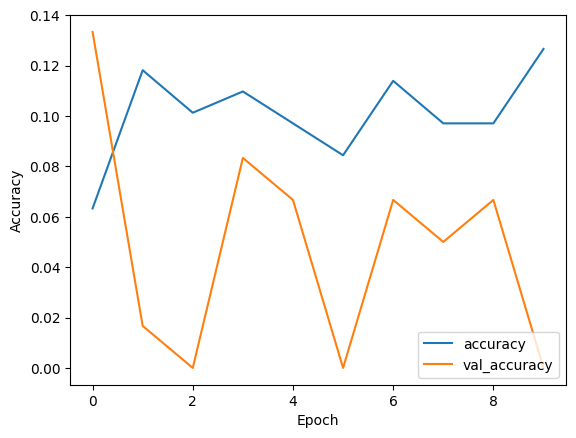

In [261]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [262]:
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 9.52%


This is a little better than our flattened dense model. Let's try an RNN.

In [263]:
X_train, X_test, y_train, y_test = train_test_split(x_full
                                                    , names_enc
                                                    , test_size=0.33, random_state=13)

X_train=np.array(X_train)
X_test=np.array(X_test)

In [264]:

#We set it so that we place the time coordinate first.


X_train_seq = X_train.transpose(0, 2,1)
X_test_seq=X_test.transpose(0,2,1)

In [265]:
X_train_seq.shape

(297, 517, 128)

In [266]:

model = Sequential([
    SimpleRNN(units=64, input_shape=(517, 128)),
    Dense(64, activation='relu'),
    Dense(12, activation='softmax') 
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [267]:
history = model.fit(X_train_seq, y_train,
                        epochs=40,
                        batch_size=16,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.0924 - loss: 2.7972 - val_accuracy: 0.0500 - val_loss: 2.6632
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.1299 - loss: 2.4586 - val_accuracy: 0.0167 - val_loss: 2.6692
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.1075 - loss: 2.4835 - val_accuracy: 0.1167 - val_loss: 2.5956
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.1419 - loss: 2.4623 - val_accuracy: 0.0667 - val_loss: 2.6263
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.1244 - loss: 2.4566 - val_accuracy: 0.0500 - val_loss: 2.6962
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.0893 - loss: 2.4676 - val_accuracy: 0.0333 - val_loss: 2.6713
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.1183 - loss: 2.5476 - val_accuracy: 0.0167 - val_loss: 2.5728
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.0929 - loss: 2.4893 - val_accuracy: 0.06

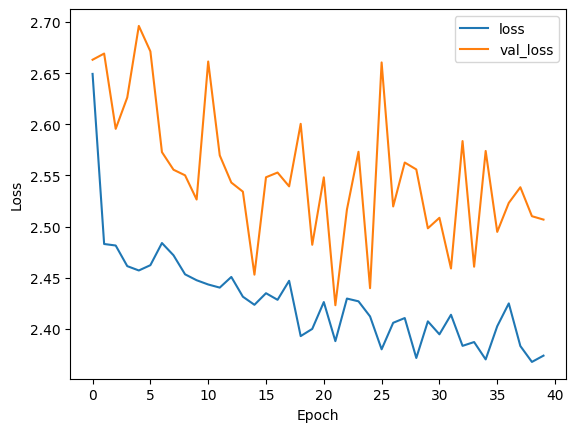

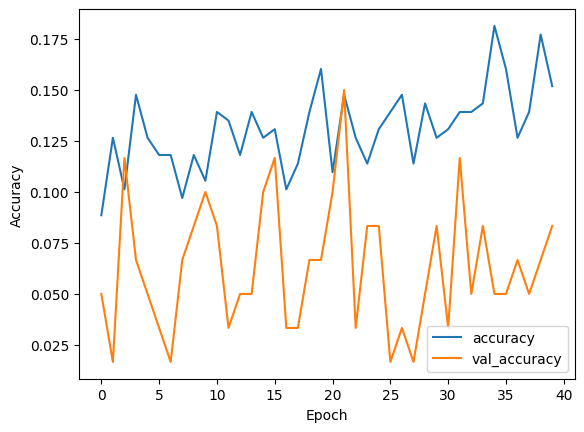

In [268]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [269]:
score = model.evaluate(X_test_seq, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 12.93%


We can finally proceed with attempting to classify our model. Let's use our best model, the RNN model.

In [270]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import h5py

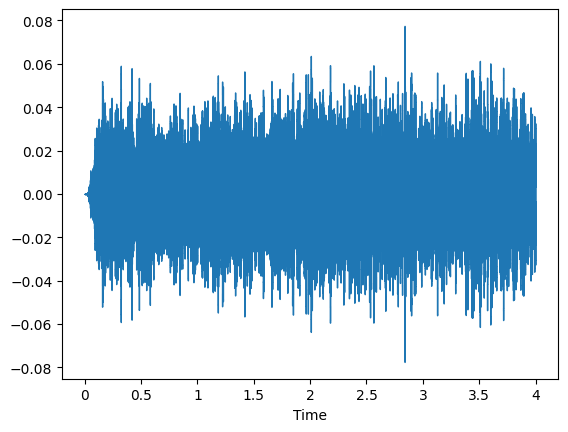

In [ ]:
y, sr = librosa.load("test1.mp3", duration=4)
librosa.display.waveshow(y, sr=sr)

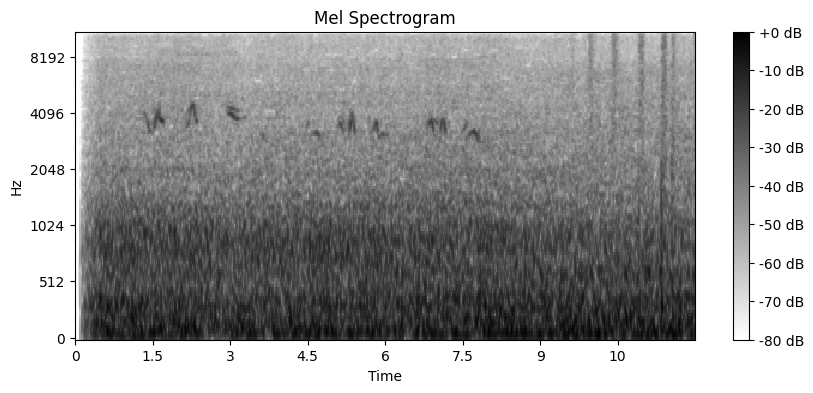

(128, 517)

In [ ]:
y, sr = librosa.load("test1.mp3", duration=3)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', sr=sr, cmap='gray_r')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()
spec_db.shape

In [ ]:
spec_test=spec_db.transpose(1,0)

In [ ]:
spec_test.shape

(517, 128)

We need our object to have a three dimensional shape.

In [ ]:
spec_test=spec_test.reshape(1,517, 128)

In [ ]:
results1=model.predict(spec_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [ ]:
enc.inverse_transform(results1)

array([['bkcchi']], dtype=object)

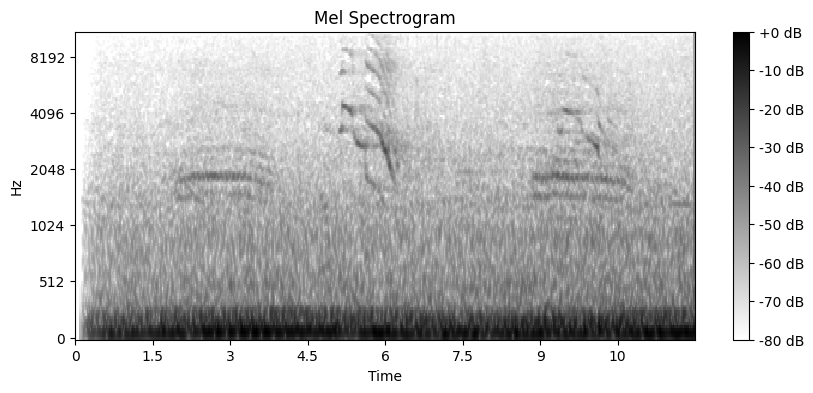

(128, 517)

In [ ]:
y, sr = librosa.load("test2.mp3", duration=3)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', sr=sr, cmap='gray_r')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()
spec_db.shape


In [ ]:
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results2=model.predict(spec_test)
enc.inverse_transform(results2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([['norfli']], dtype=object)

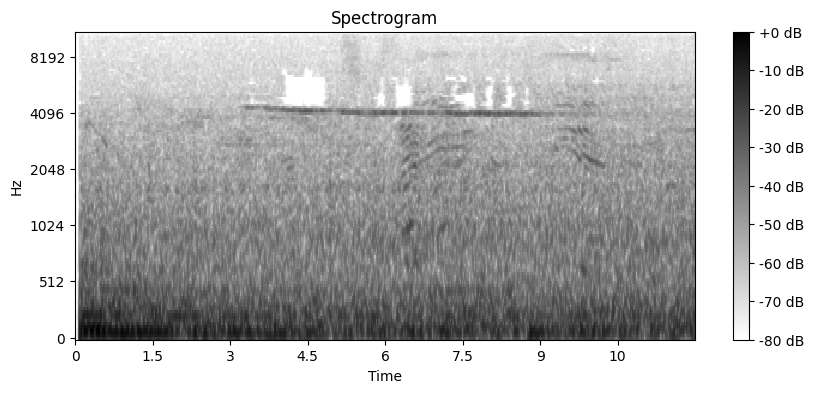

(128, 517)

In [ ]:
y, sr = librosa.load("test3.mp3", duration=3)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', sr=sr, cmap='gray_r')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()
spec_db.shape


In [ ]:
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results3=model.predict(spec_test)
enc.inverse_transform(results3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([['bkcchi']], dtype=object)

Find the below the appendix that I use to generate visuals for my report.

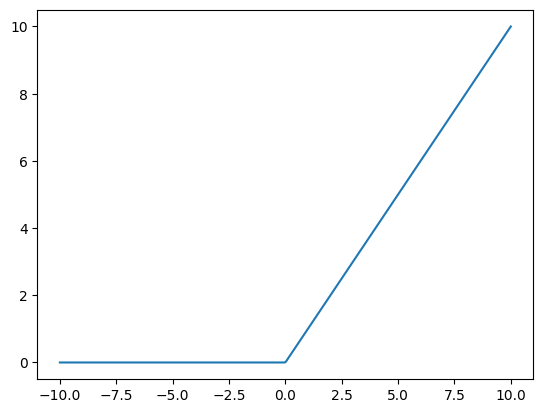

In [284]:
def relu(x):
    return np.max([0,x])
x = np.linspace(-10, 10, 400)
y = [relu(k) for k in x]

plt.plot(x, y)

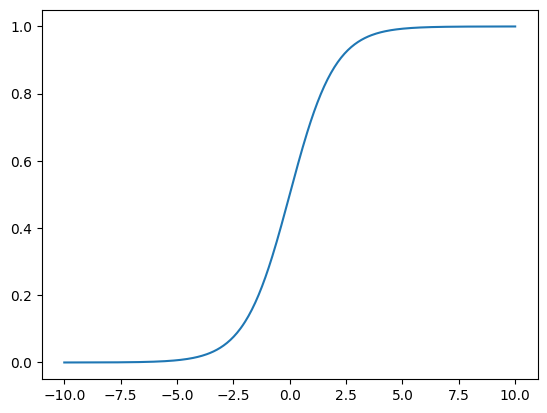

In [277]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10, 400)
y = sigmoid(x)

plt.plot(x, y, label='sigmoid(x)')

In [1]:
!jupyter nbconvert JL_Practical_Homework_3_NN.ipynb --to html --template classic

[NbConvertApp] Converting notebook JL_Practical_Homework_3_NN.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 25 image(s).
[NbConvertApp] Writing 1700519 bytes to JL_Practical_Homework_3_NN.html
